# LSTM-Solar-Production-ERCOT
The goal of this project is to create a machine learning pipeline that utilizes long short-term memory (LSTM) to predict aggregate solar energy production throughout Texas's ERCOT grid.

Texas is of particular interest for the following reasons: 

1. It has extreme solar irradiance
2. It contains the majority of utility-scale solar installations
3. It experiences the most significant transmission constraints
4. It has the most pronounced price effects due to renewable generation


In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print(os.getcwd())

SolarData = pd.read_csv("../Data/SolarData.csv")
SolarData.isna().sum()


c:\Users\Michael Gray\Documents\LSTM Solar Production\Models


Time (Hour-Ending)               0
Date                             0
ERCOT.LOAD                       0
ERCOT.PVGR.GEN                   0
Total Solar Installed, MW        0
Solar Output, % of Load          0
Solar Output, % of Installed     0
Solar 1-hr MW change             3
Solar 1-hr % change              3
Daytime Hour                    24
Ramping Daytime Hour            24
dtype: int64

### Basic Data Visualization and Statistical Tests:

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Date range: 2022-01-01 01:00:00 to 2025-01-01 00:00:00
Number of observations: 26304


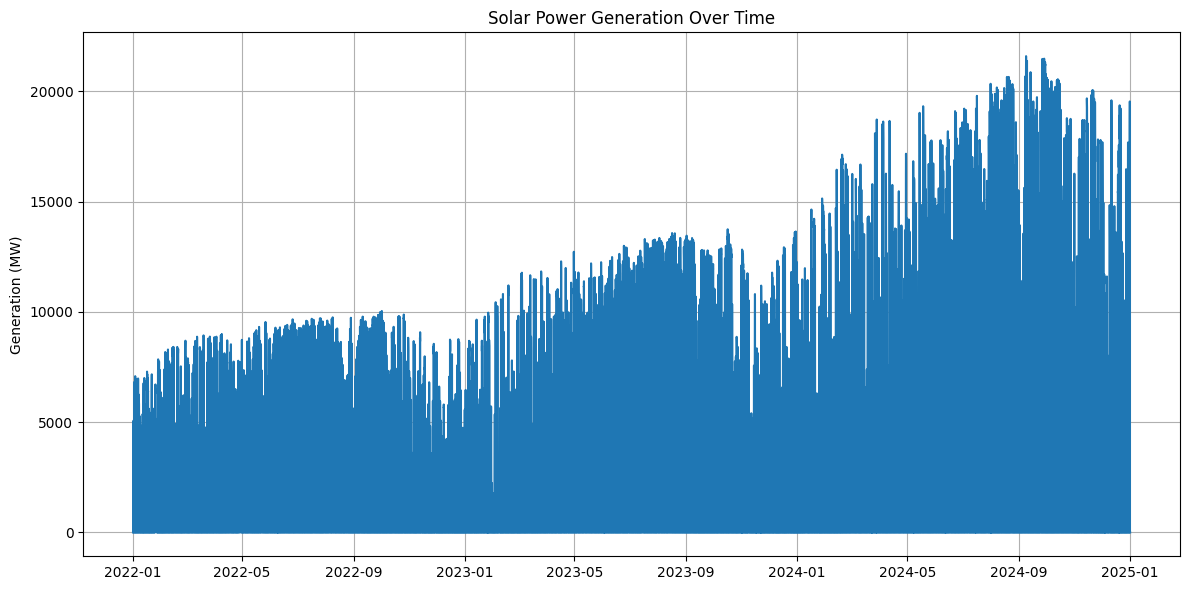

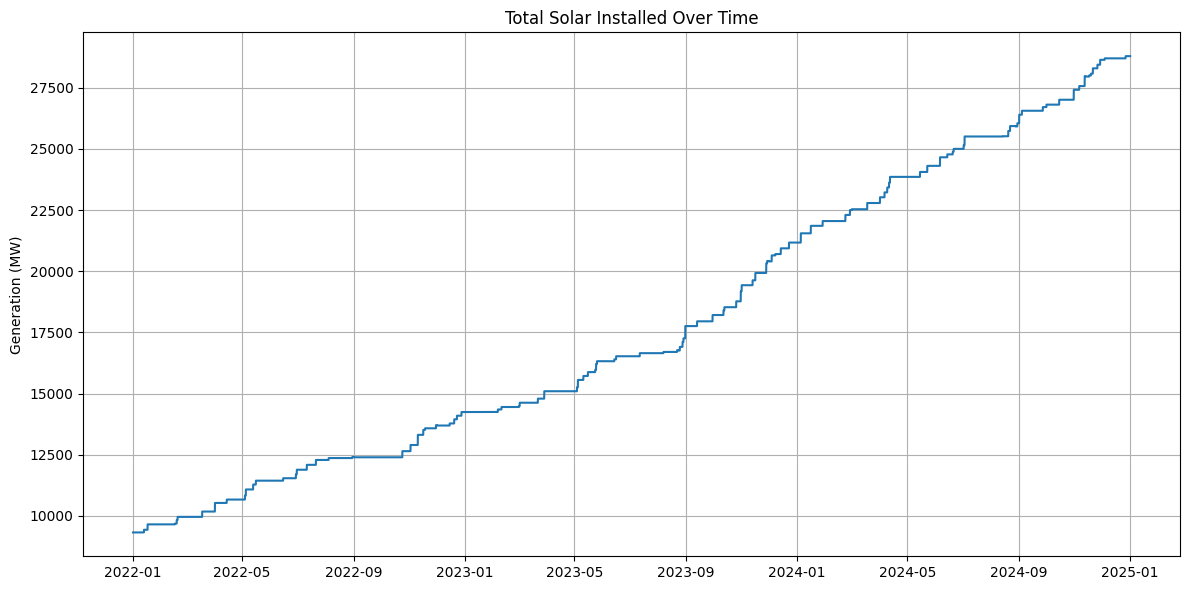

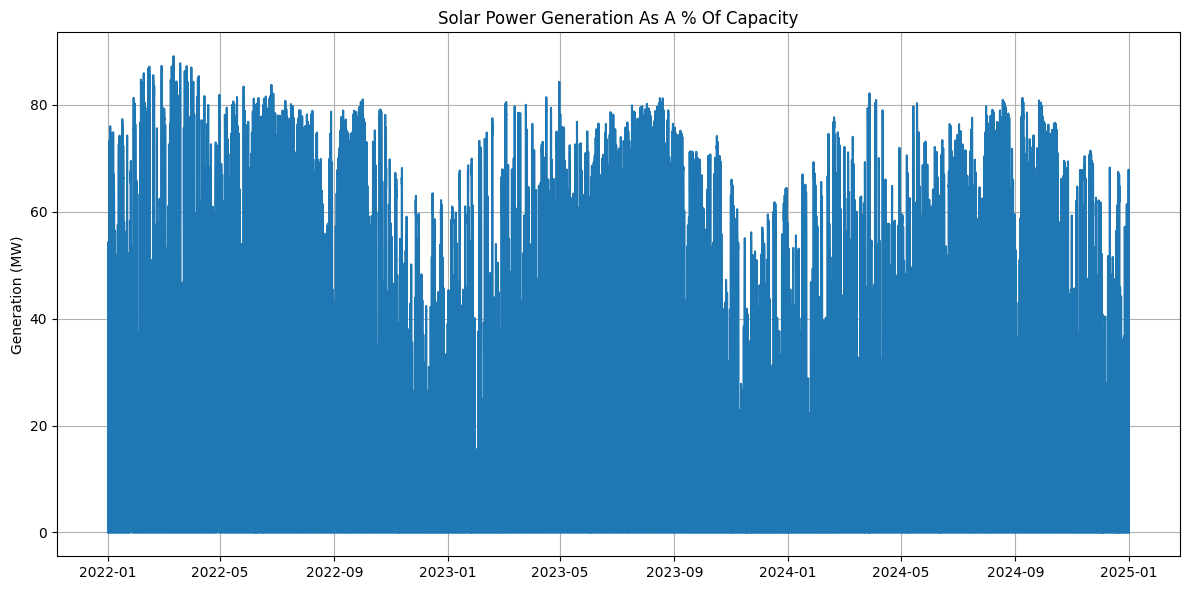

ADF Statistic: -7.747723834768112
p-value: 1.0213526304283474e-11
Result: The series is stationary (p-value < 0.05)
ADF Statistic: -10.375247980168133
p-value: 2.210277085597212e-18
Result: The series is stationary (p-value < 0.05)


In [6]:
SolarData = pd.read_csv("../Data/SolarData.csv")

SolarData['Time (Hour-Ending)'] = pd.to_datetime(SolarData['Time (Hour-Ending)'])
SolarData = SolarData.set_index('Time (Hour-Ending)')
print(f"Index type: {type(SolarData.index)}")
print(f"Date range: {SolarData.index.min()} to {SolarData.index.max()}")
print(f"Number of observations: {len(SolarData)}")

# Time series plot of Solar Generated Over Time
plt.figure(figsize=(12,6))
plt.plot(SolarData.index, SolarData['ERCOT.PVGR.GEN'])
plt.title('Solar Power Generation Over Time')
plt.ylabel('Generation (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()







# Time series plot of Solar Installed Over Time

plt.figure(figsize=(12,6))
plt.plot(SolarData.index, SolarData['Total Solar Installed, MW'])
plt.title('Total Solar Installed Over Time')
plt.ylabel('Generation (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Time series plot of solar generated as a % of total capacity

plt.figure(figsize=(12,6))
plt.plot(SolarData.index, SolarData['Solar Output, % of Installed'])
plt.title('Solar Power Generation As A % Of Capacity')
plt.ylabel('Generation (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()

solar_series = SolarData['ERCOT.PVGR.GEN'].dropna()
result = adfuller(solar_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


if result[1] < 0.05:
    print("Result: The series is stationary (p-value < 0.05)")
else:
    print("Result: The series is non-stationary (p-value >= 0.05)")



solar_series_capacity = SolarData['Solar Output, % of Installed'].dropna()
result = adfuller(solar_series_capacity)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("Result: The series is stationary (p-value < 0.05)")
else:
    print("Result: The series is non-stationary (p-value >= 0.05)")



In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import math

# Assuming SolarData is already loaded as in your code
# Focus on our target variable
data = SolarData['Solar Output, % of Installed'].values.reshape(-1, 1)

# Scale the data to [0,1] range - important for LSTM performance
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create sequences (lookback window)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length (lookback period) - e.g., 24 hours
seq_length = 24

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape input for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



ImportError: Traceback (most recent call last):
  File "c:\Users\Michael Gray\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.